In [1]:
import pandas as pd # Pandas kütüphanesini veri manipülasyonu, veri görüntülemesi ve analiz için projeye dahil ettim.
import matplotlib.pyplot as plt # Matplotlib kütüphanesini, grafik çizdirmek ve veriler arasındaki ilişkiye görselleştirmek için dahil ettim.
import seaborn as sns # Seaborn ile daha kapsamlı grafik görüntüleme amacı için projeye dahil ettim.
import numpy as np # Karmaşık matematiksel işlemler için numpy kütüphanesini dahil ettim.

In [2]:
# CSV Formatındaki Dataset'i DataFrame olarak projeye dahil etmek için
# pandas'ın read_csv adındaki fonksiyonunu kullanarak HousingData.csv
# okuyorum ve df adındaki bir değişkene DataFrame olarak kayıt ediyorum.
df = pd.read_csv("HousingData.csv")

In [3]:
# İlk 5 satırı, veri setimizin doğru import edildiğini teyit etmek için
# görüntülüyorum.
# Bunun için DataFrame üzerinden head fonksiyonunu çağırıyorum.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Burada head() fonksiyonunun çıktısı bize veri setinin doğru bir şekilde yüklendiğini gösteriyor.

In [4]:
# Veri setinin içerisinde yer alan sütun'ların özelliklerini (sütun adı, tipi, null olabilir mi?)
# görüntülemek, toplamda kaç adet satırın olduğunu, bellek üzerinde ne kadar yer kapladığını
# görüntülemek için info() fonksiyonundan faydalanıyorum.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# Veri setini içerisinde yer alan sayısal sütunların, sayısal analizini yapmak için
# (mean, count, std, min, max ... gibi) describe fonksiyonunu kullanıyorum.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# Veri setinde yer alan sütun ve satır sayısı için shape özelliğini kullanabilirim.
satir_sayisi, sutun_sayisi = df.shape
print(f"Satır Sayısı: {satir_sayisi}\nSütun Sayısı: {sutun_sayisi}")

Satır Sayısı: 506
Sütun Sayısı: 14


In [9]:
# Null verilerin sütun bazında sayısını görmek için yani her bir sütunda kaç adet
# null veri var görmek için isnull().sum() fonksiyonunu kullanıyorum.
# Öncelikle isnull() fonksiyonunu çalıştıralım. isnull() her bir satır için hangi
# sütunun null olduğunu boolean bir değer ile göstermektedir.
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Eğer isnull().sum() yaparsak, her bir sütun için kaç satırın null olduğunu gösterir.
# Yukarıdaki çıktıya bakarsak bize True olan satır sayısını sütun bazında verecektir.
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
# Null olan hücreleri doldurmak için fillna() fonksiyonunu çağırabiliriz. Bu durumda
# mean ya da median gibi matematiksel işlem ile boş olan hücreleri doldurabiliriz.
# inplace=True olma durumunda mevcut olan DataFrame üzerine güncelleme yap diyoruz.
df.fillna(df.mean(), inplace=True)

In [12]:
# Yeniden null verilerin sayısını görüntülersek;
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Göreceğiniz üzere null veri sayısı her bir sütun için 0 olmuştur. Başarıyla null verileri fillna() fonksiyonu ile doldurduk.

In [13]:
# DataFrame üzerinden to_csv() fonksiyonunu kullanarak mevcut DataFrame'i csv olarak kaydedebiliriz.
# index=False olması, csv içerisinde index sütununun açılmasını engelliyor.
df.to_csv("New_HousingData.csv", index=False)

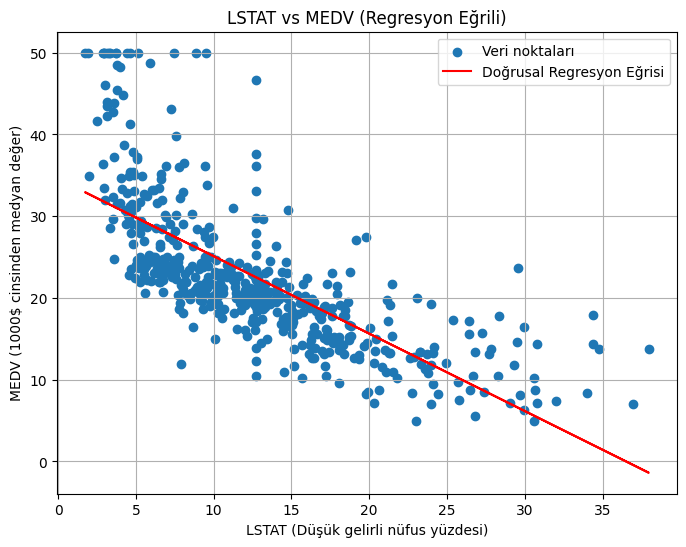

In [19]:
# Seçmiş olduğum 1. senaryo;
# LSTAT düşük gelirli nüfus oranı ile MEDV yani ev fiyatları.
# Düşük gelirli nüfus oranı arttıkça ev fiyatları belirgin bir şekilde düşüyor. 
# Negatif bir ilişki olduğunu görüntüleyebiliyorum.
# 1 dereceli doğrusal regresyon eğrisi oluşturuyorum.
coeffs = np.polyfit(df["LSTAT"], df["MEDV"], deg=1)
regression_line = np.poly1d(coeffs)
plt.figure(figsize=(8, 6))
plt.scatter(df["LSTAT"], df["MEDV"], label="Veri noktaları")
plt.plot(df["LSTAT"], regression_line(df["LSTAT"]), color='red', label="Doğrusal Regresyon Eğrisi")
plt.title("LSTAT vs MEDV (Regresyon Eğrili)")
plt.xlabel("LSTAT (Düşük gelirli nüfus yüzdesi)")
plt.ylabel("MEDV (1000$ cinsinden medyan değer)")
plt.legend()
plt.grid(True)
plt.show()

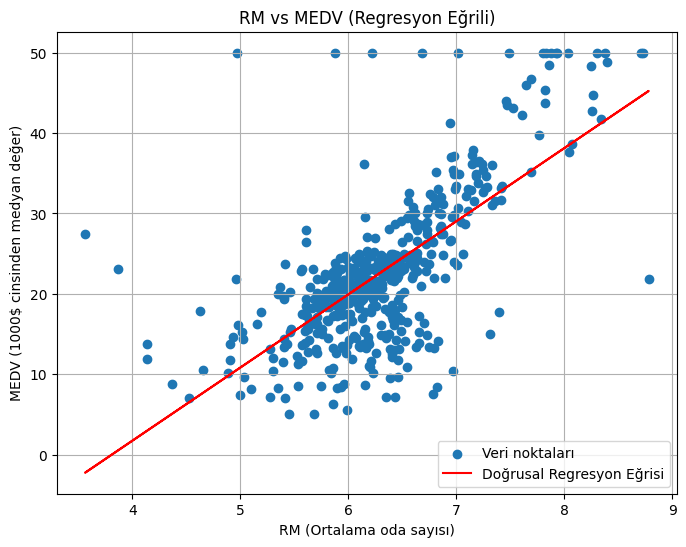

In [24]:
# Seçmiş olduğum 2. senaryo;
# RM yani Ortalama Oda Sayısı ile Ev Fiyatlarını karşılaştırıyorum.
# Ortalama oda sayısı arttıkça ev fiyatlarının oldukça belirgin bir şekilde yükseldiği görülüyor.
# 1 dereceli doğrusal regresyon eğrisi oluşturuyorum.
coeffs_rm = np.polyfit(df["RM"], df["MEDV"], deg=1)
regression_line_rm = np.poly1d(coeffs_rm)
plt.figure(figsize=(8, 6))
plt.scatter(df["RM"], df["MEDV"], label="Veri noktaları")
plt.plot(df["RM"], regression_line_rm(df["RM"]), color='red', label="Doğrusal Regresyon Eğrisi")
plt.title("RM vs MEDV (Regresyon Eğrili)")
plt.xlabel("RM (Ortalama oda sayısı)")
plt.ylabel("MEDV (1000$ cinsinden medyan değer)")
plt.legend()
plt.grid(True)
plt.show()